In [1]:
# Import libraries need for  Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('winequality-red.csv')

In [3]:
dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (1599, 12)


In [5]:
# Dataframe columns
dt.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# To find types of data present in the dataset
dt.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [7]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column fixed acidity has [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5] unique elements
****************************************************************************************************
This column volatile acidity has [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0

In [8]:
# Seeing for the null values in the dataset
dt.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

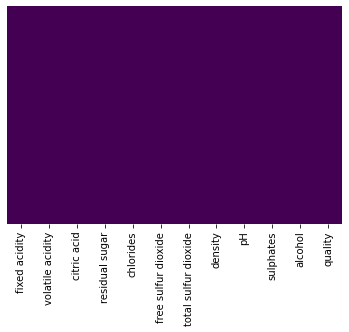

In [9]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [10]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# To find the correlection in the dataset
dt.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

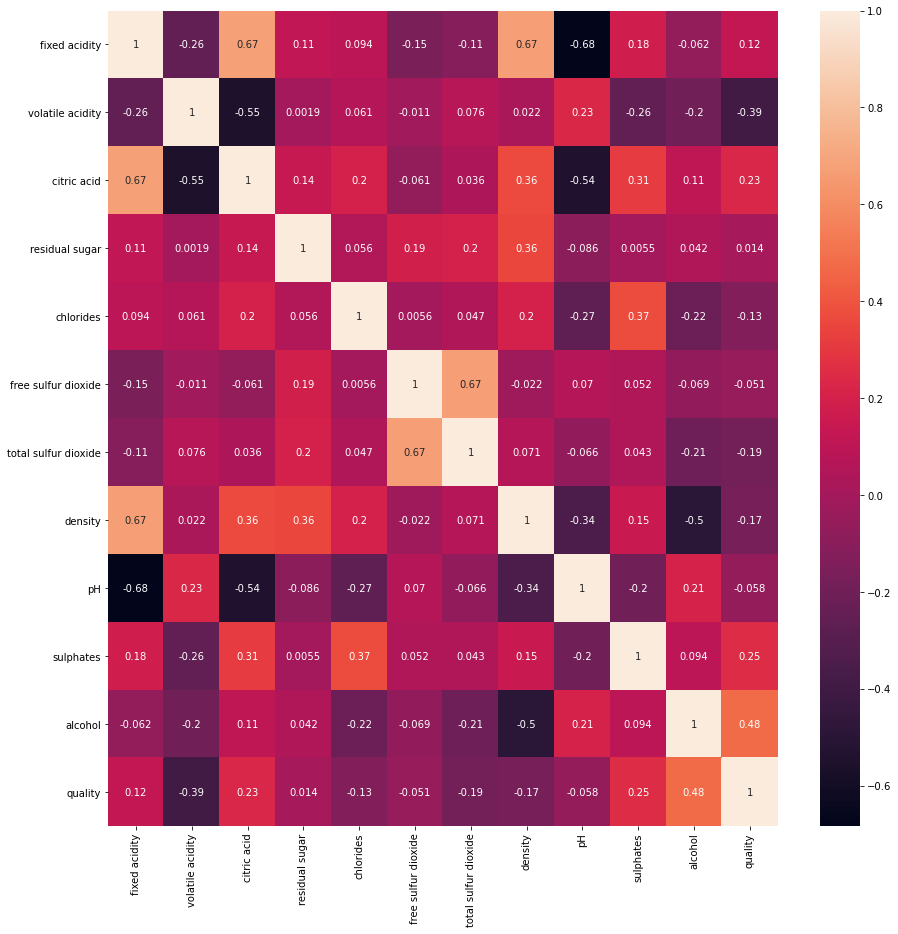

In [12]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [13]:
dt.drop_duplicates(keep='first',inplace=True)

In [14]:
# To see the skewness
dt.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [15]:
dt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
e=dt.corr()
e['quality'].sort_values()

volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
fixed acidity           0.119024
citric acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

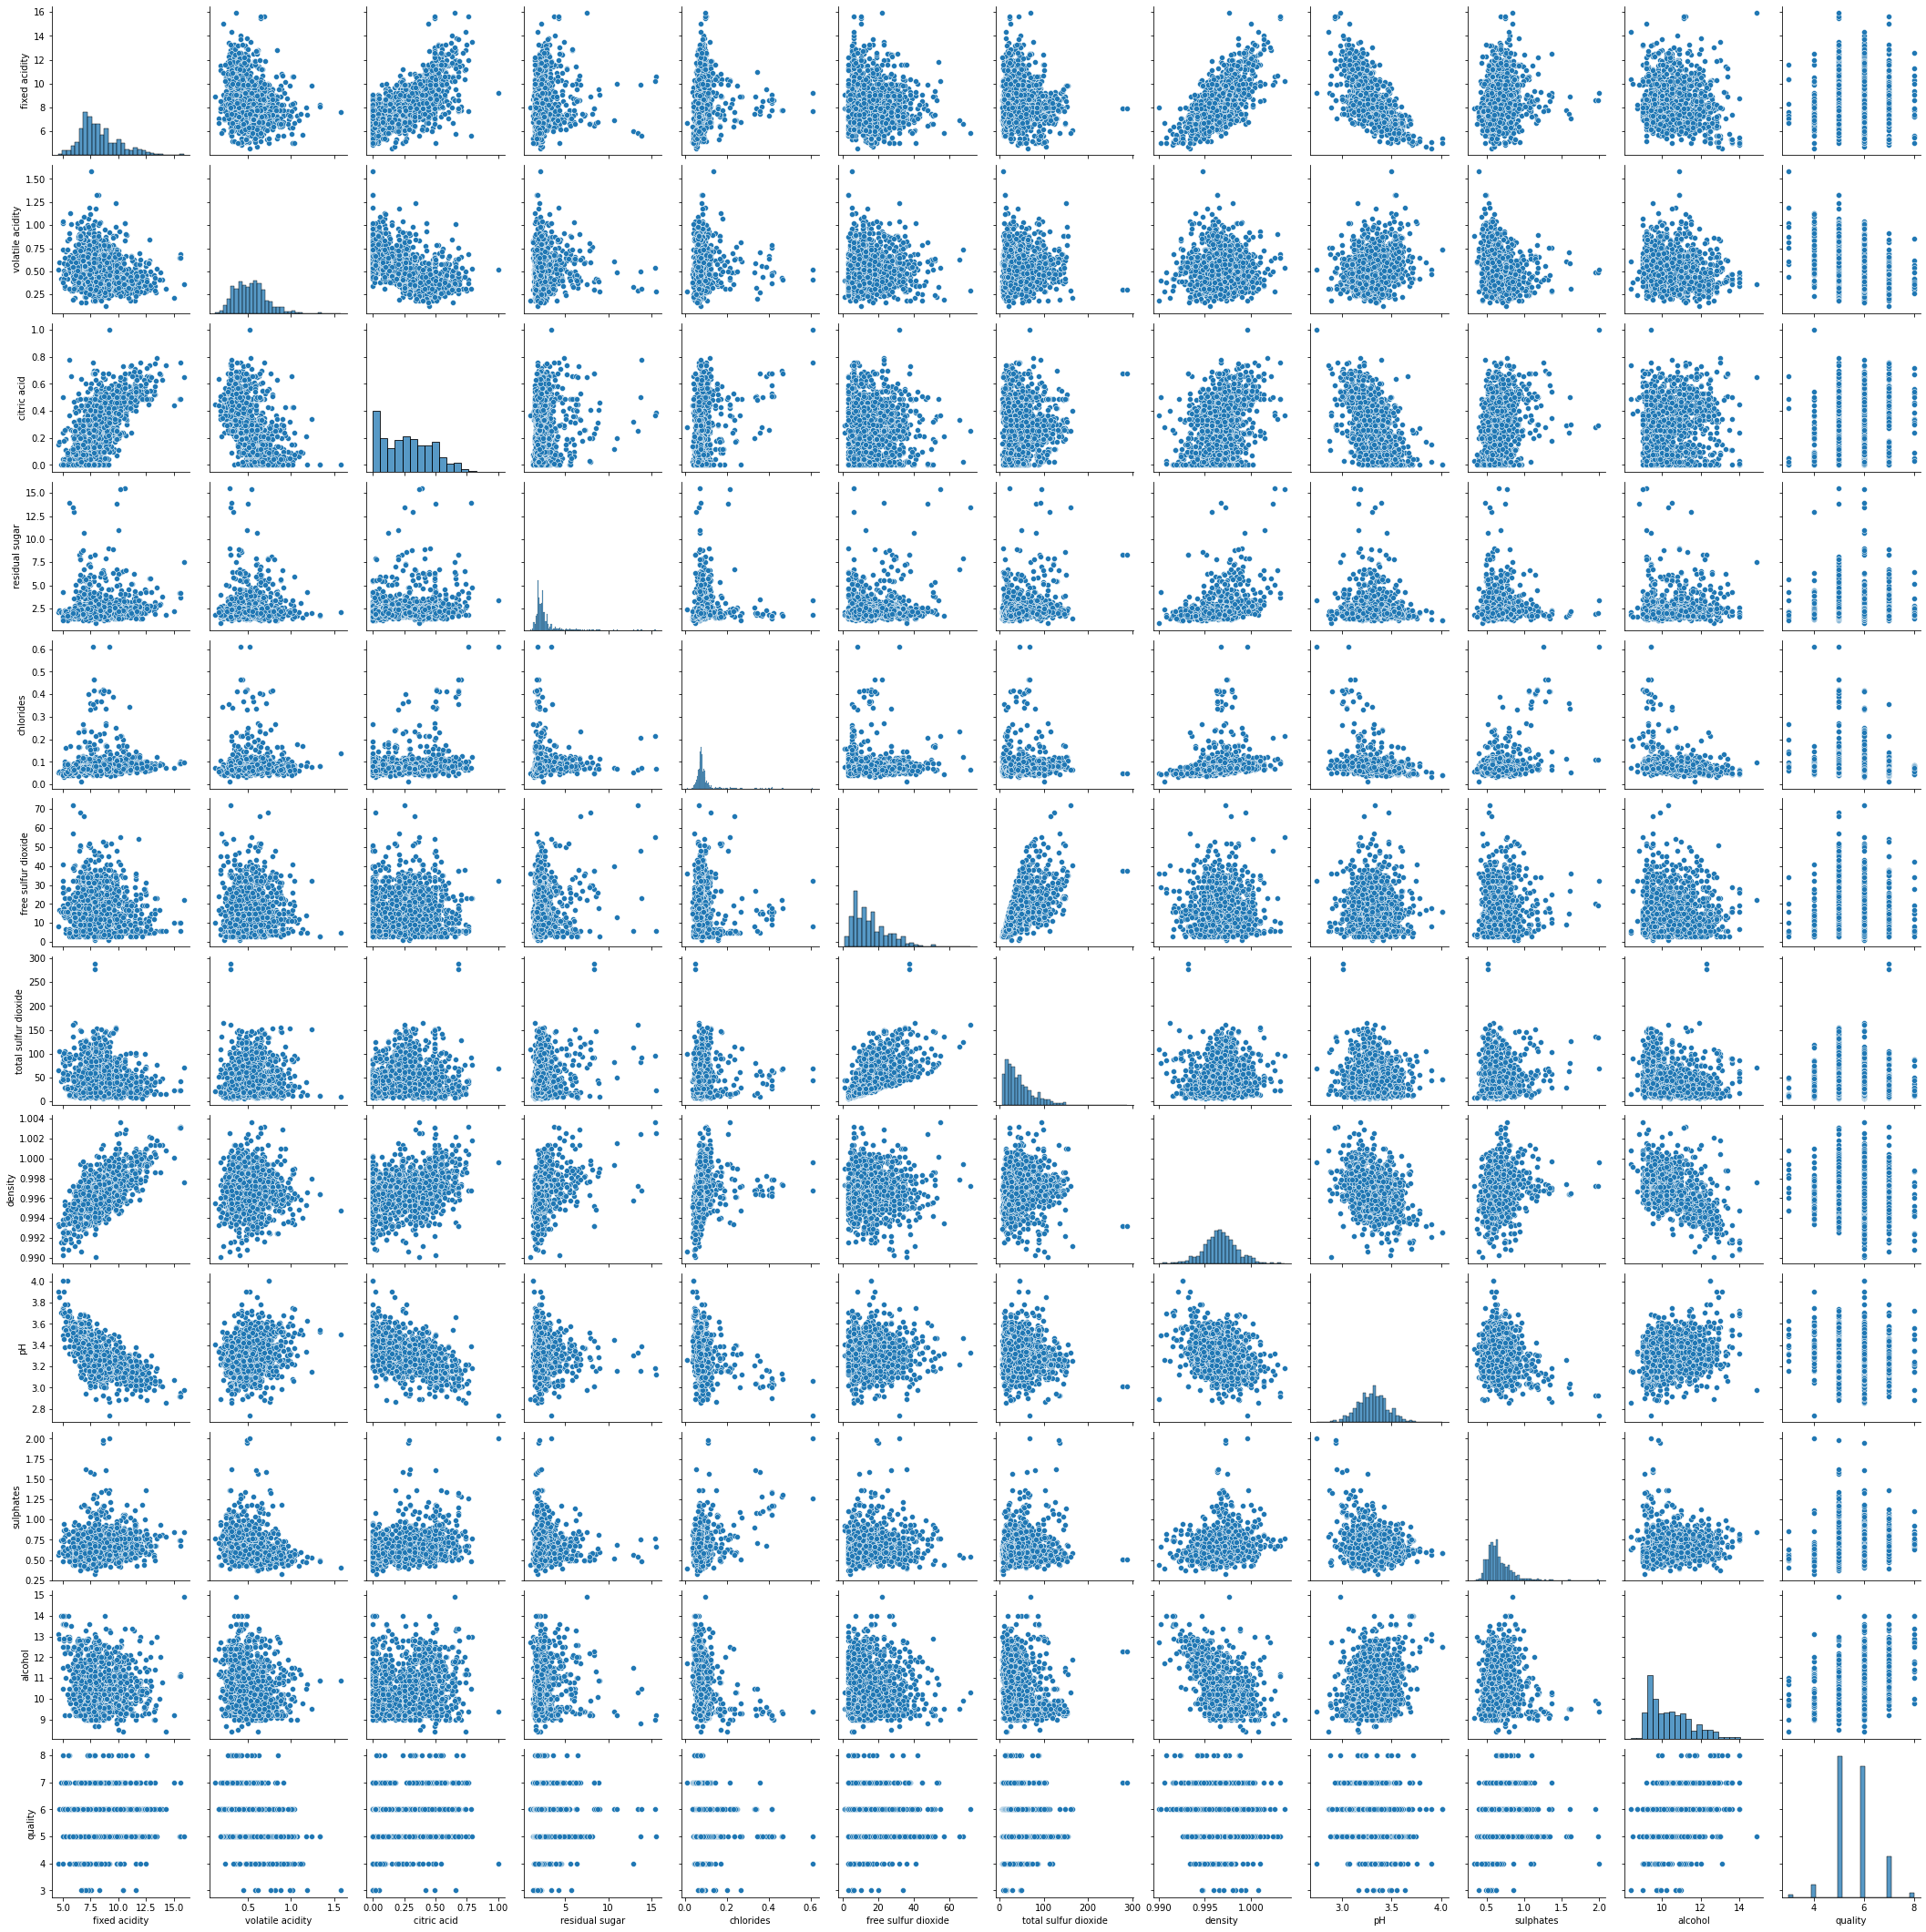

In [16]:
sns.pairplot(dt)

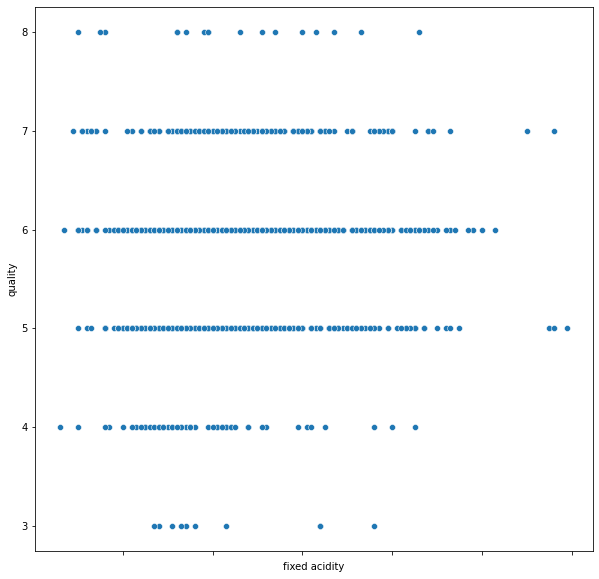

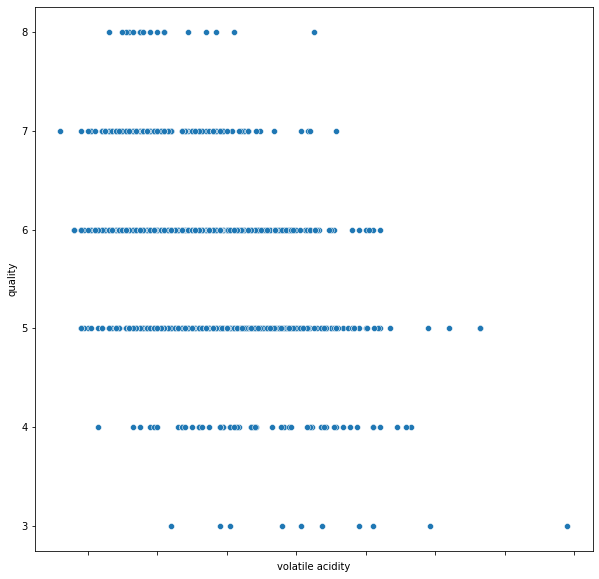

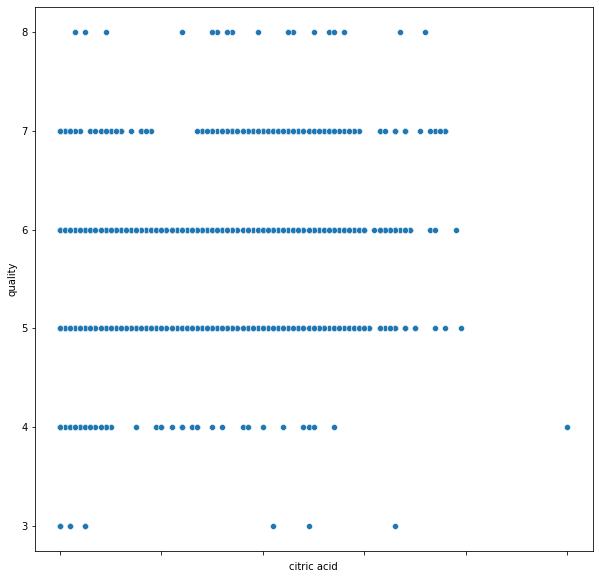

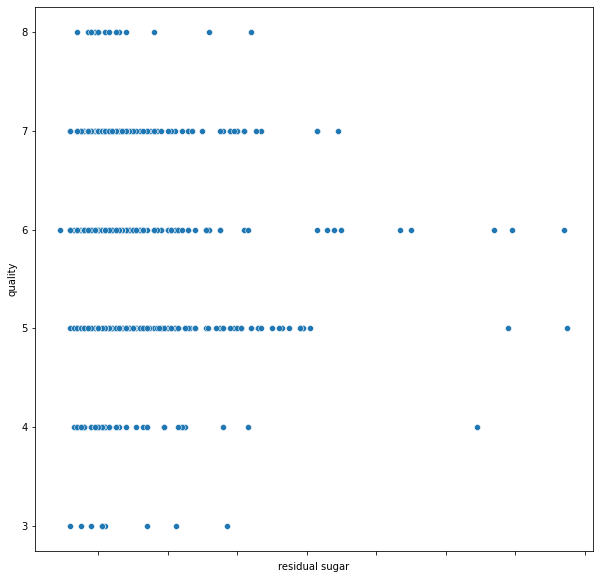

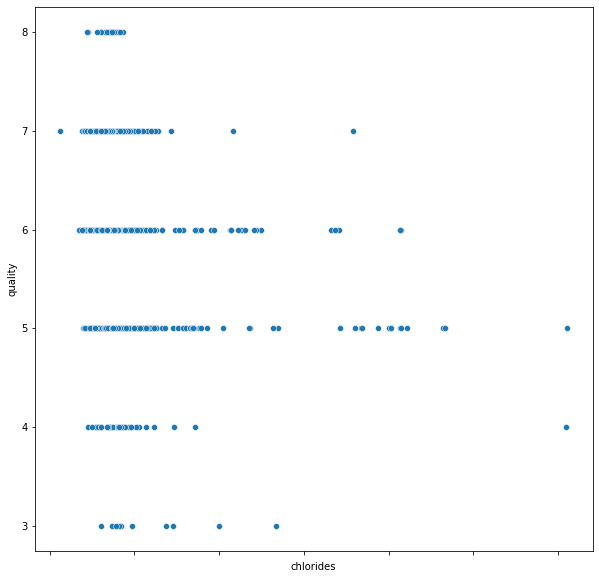

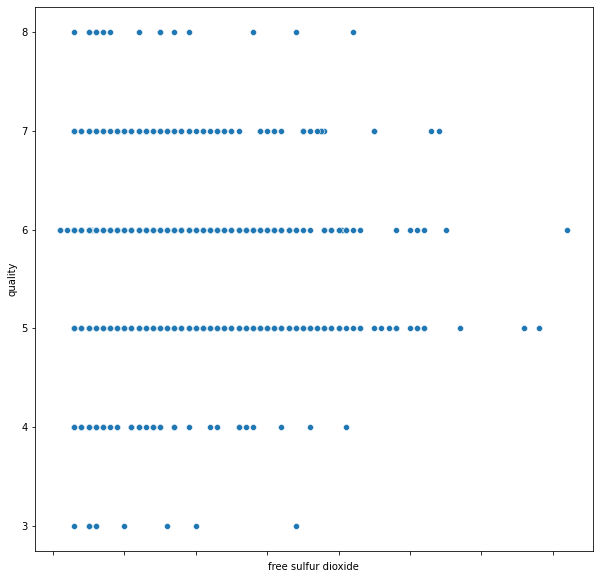

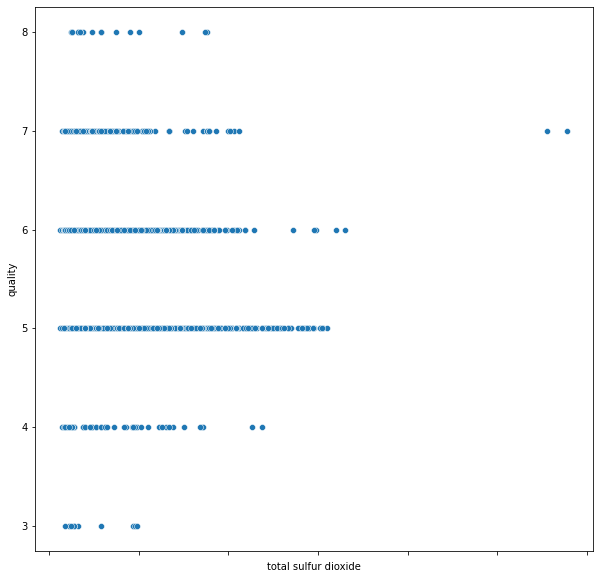

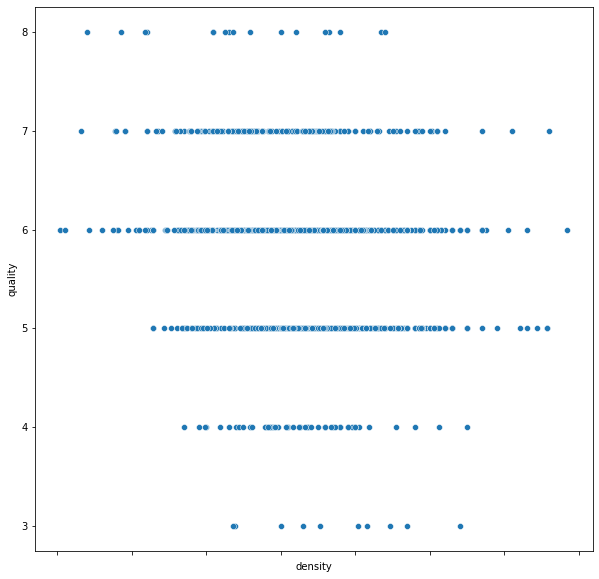

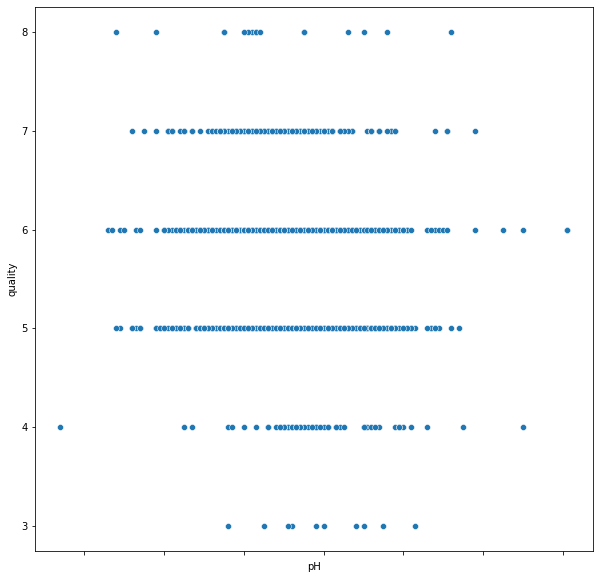

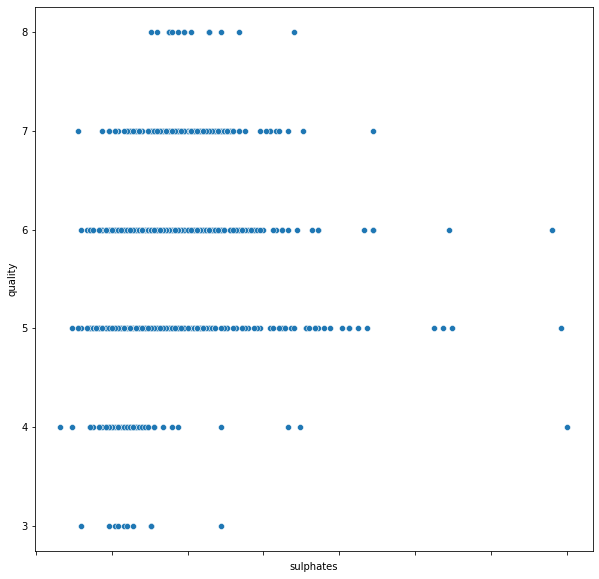

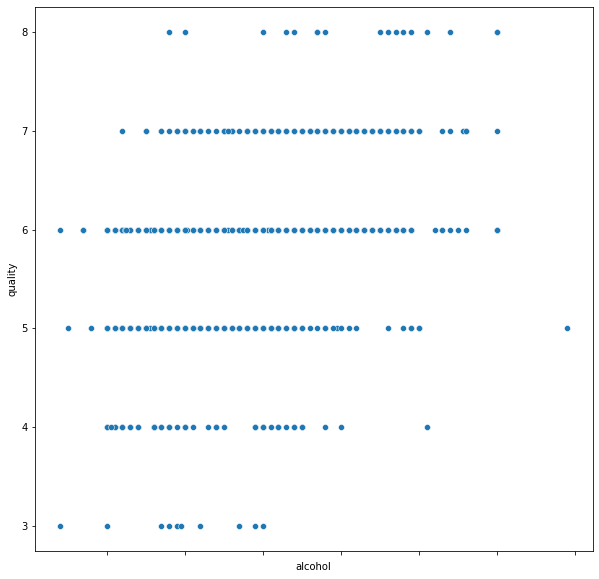

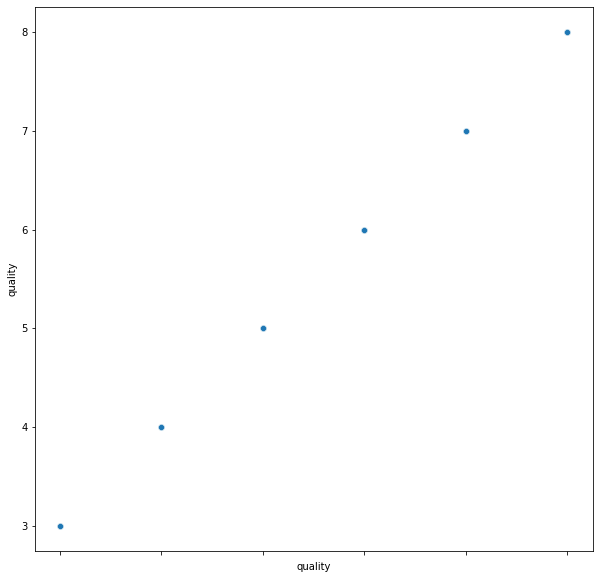

In [22]:
for col in dt:
    plt.subplots(figsize=(10,10))
    chart =sns.scatterplot(x=col,y='quality', data=dt)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
    plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

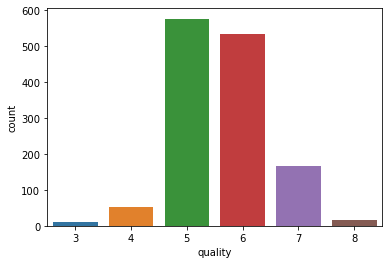

In [23]:
sns.countplot(dt['quality'])

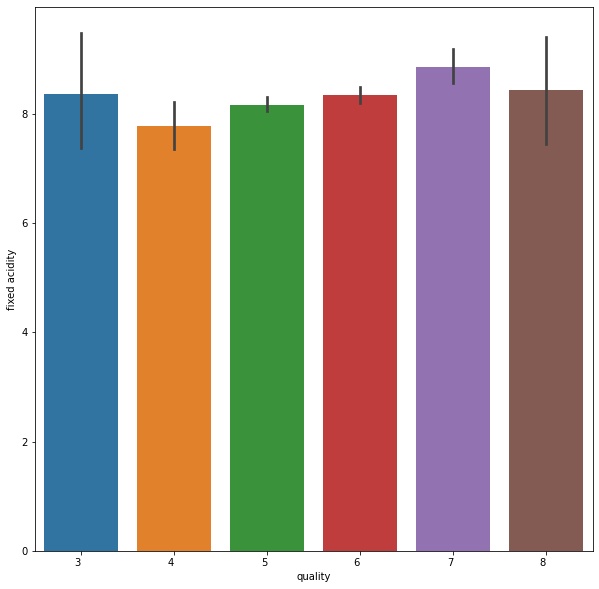

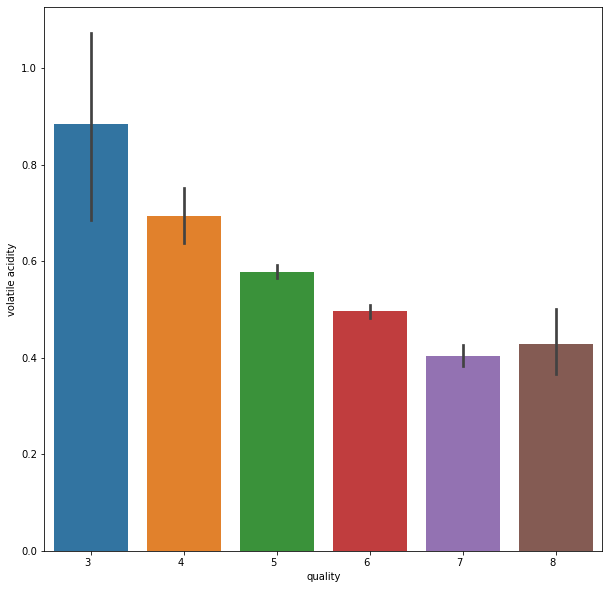

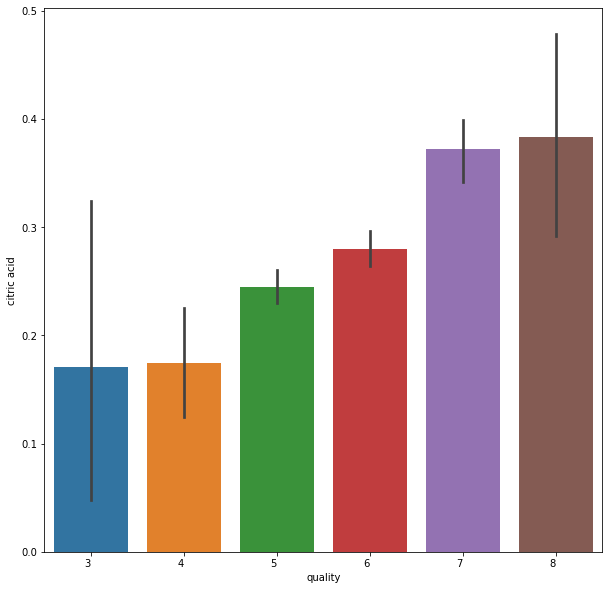

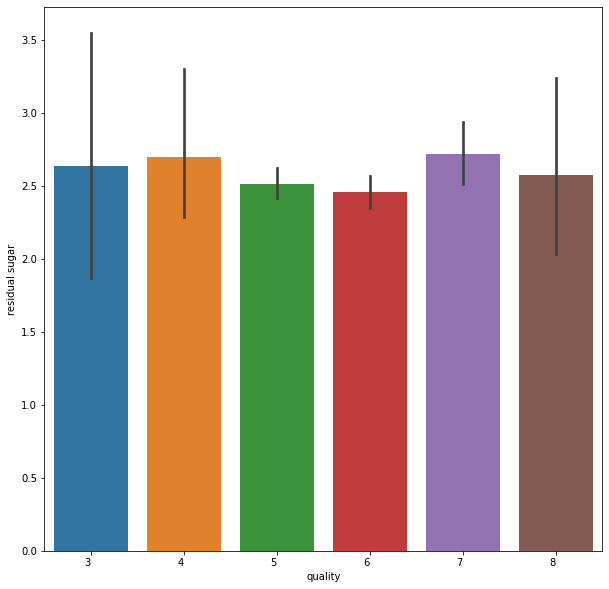

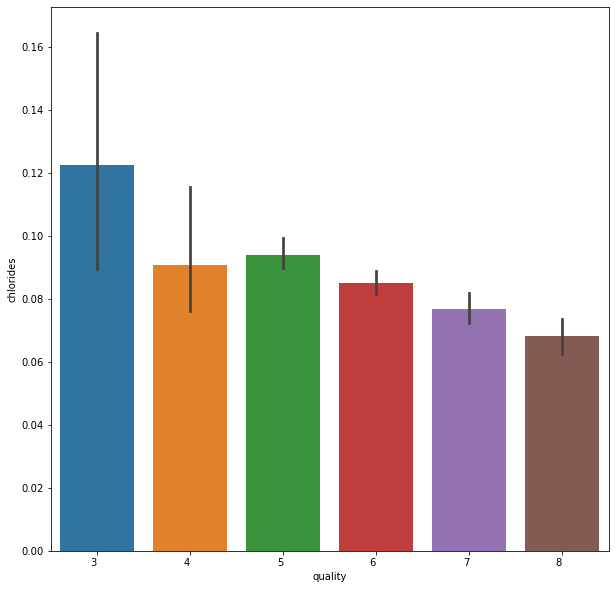

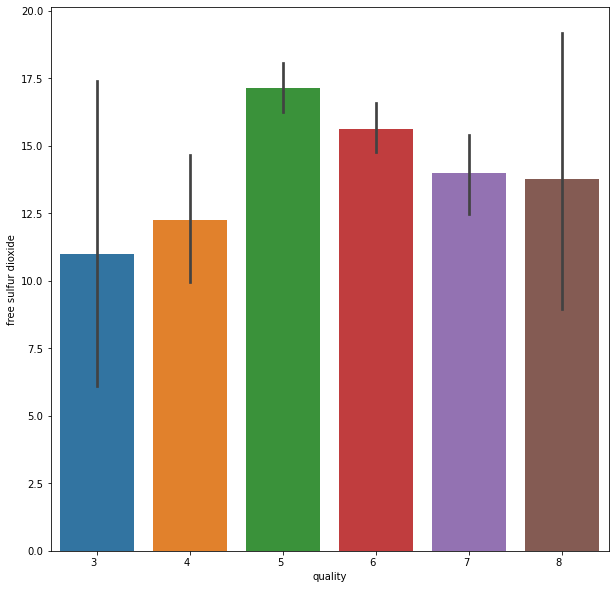

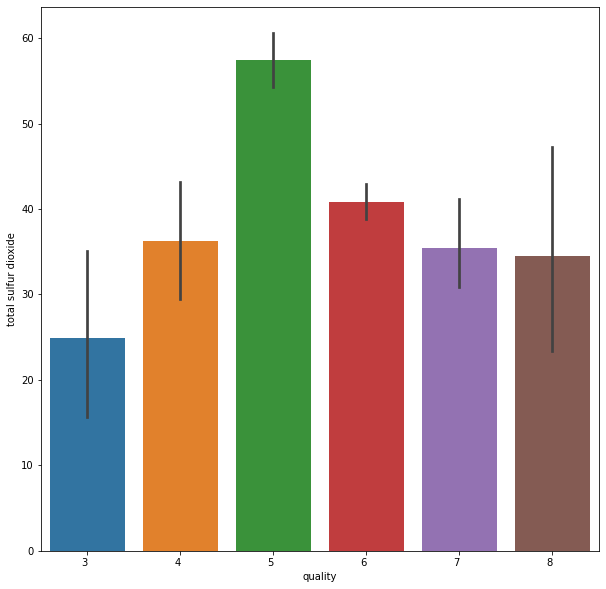

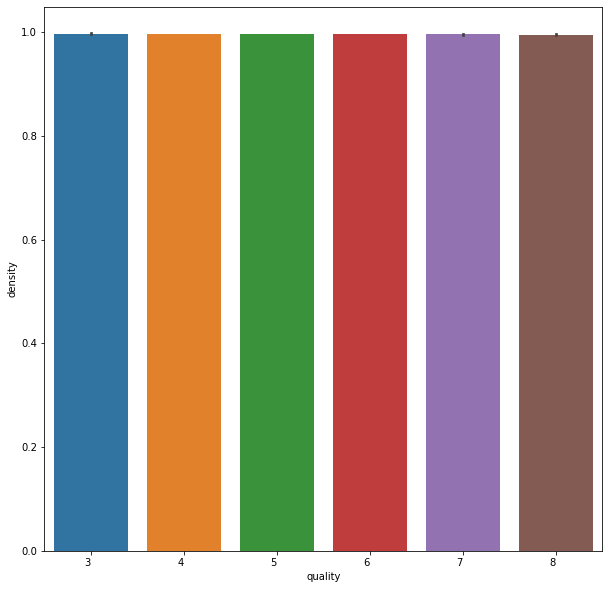

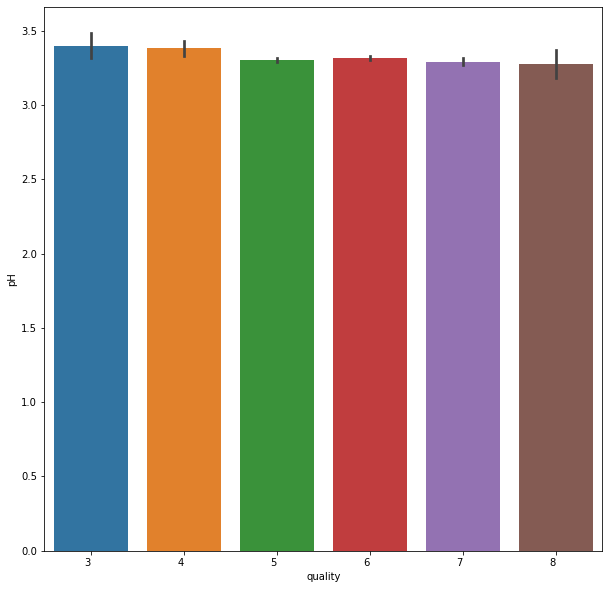

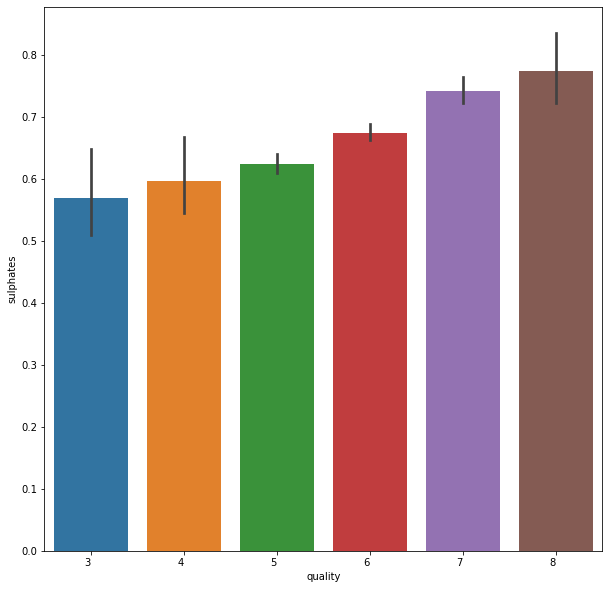

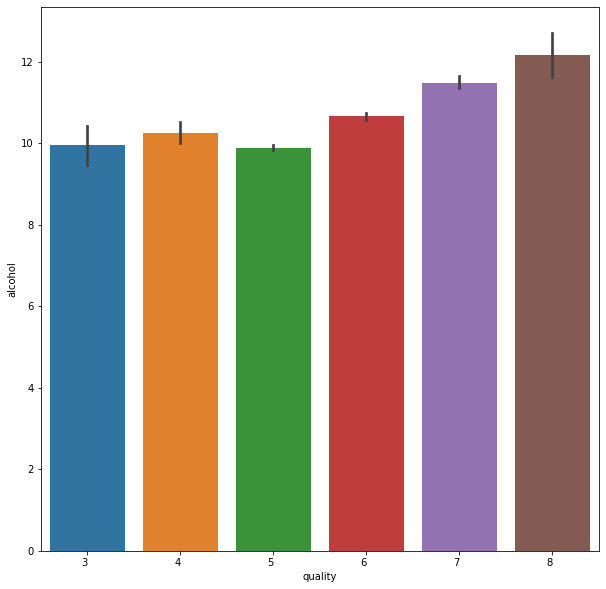

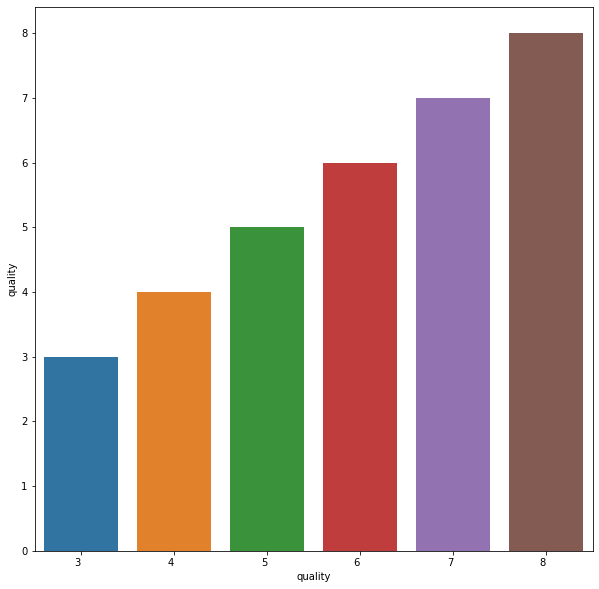

In [26]:
for col in dt:
    plt.subplots(figsize=(10,10))
    chart=sns.barplot(x='quality', y=col, data=dt)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
    plt.show()

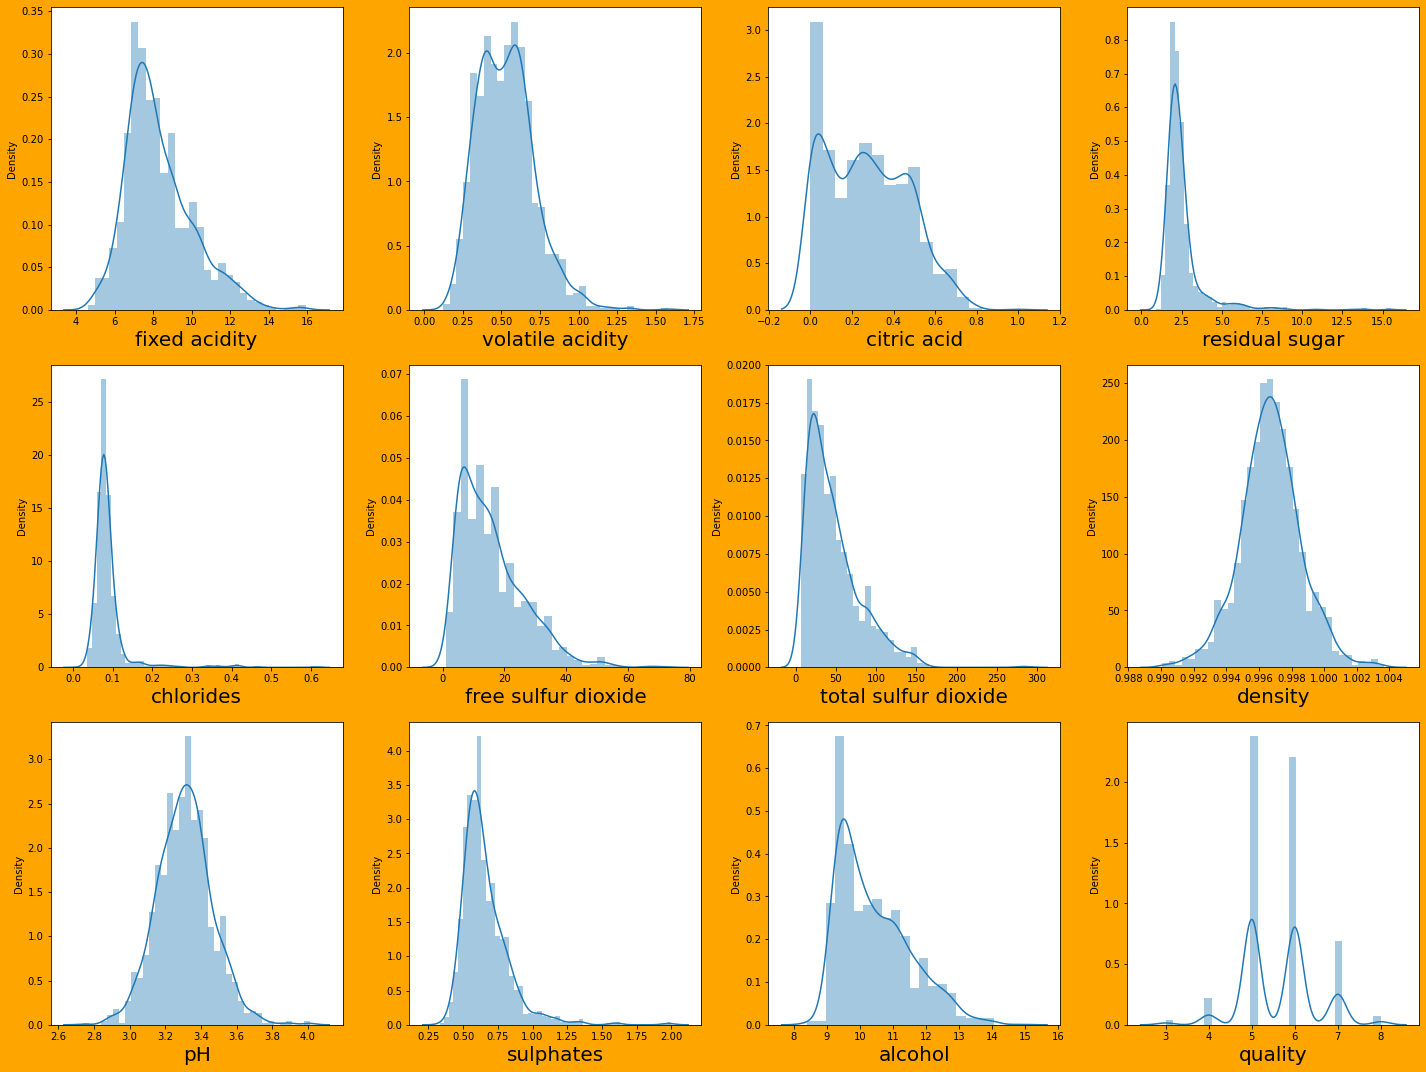

In [17]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber=1
for column in dt:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

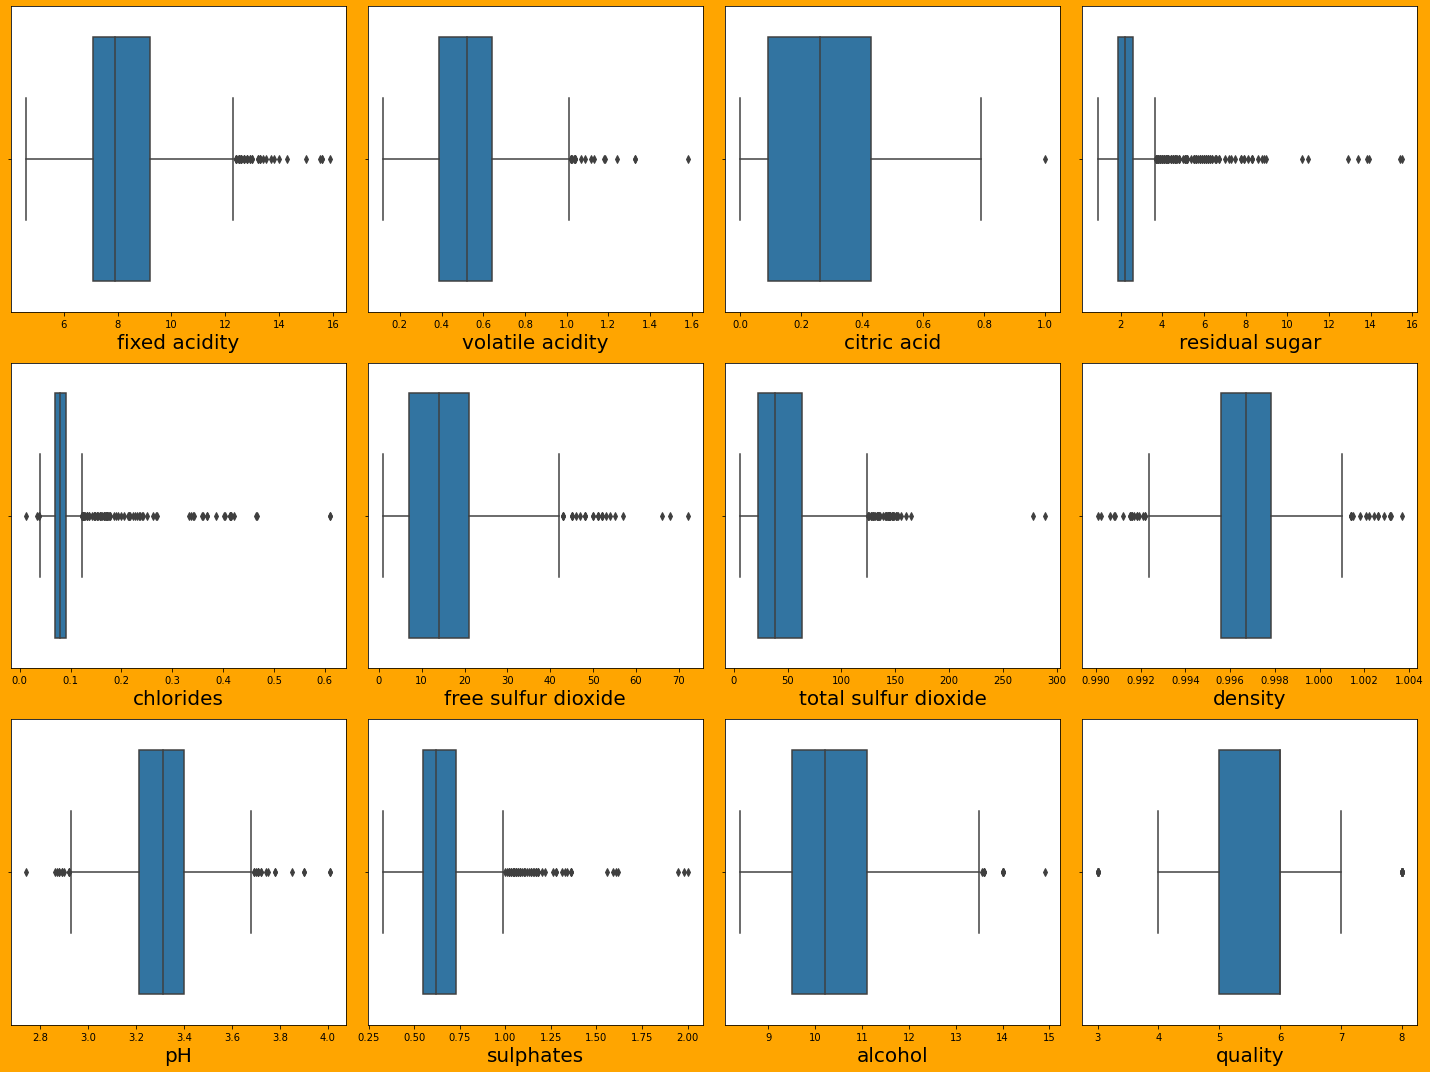

In [18]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber=1
for column in dt:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:ylabel='Density'>

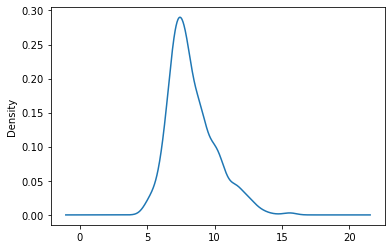

In [19]:
dt['fixed acidity'].plot(kind='kde')

<AxesSubplot:>

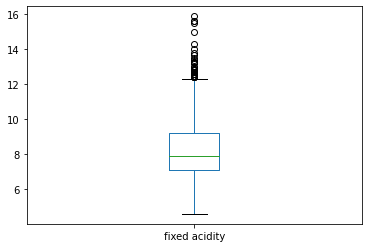

In [20]:
dt['fixed acidity'].plot(kind='box')

In [21]:
IQR=dt['fixed acidity'].quantile(0.75)-dt['fixed acidity'].quantile(0.25)
lower_bridge=dt['fixed acidity'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['fixed acidity'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

3.95 12.349999999999998


In [22]:
dt.loc[dt['fixed acidity']>=12.349999999999998,'fixed acidity']=12.349999999999998
dt.loc[dt['fixed acidity']<=3.95,'fixed acidity']=3.95

<AxesSubplot:>

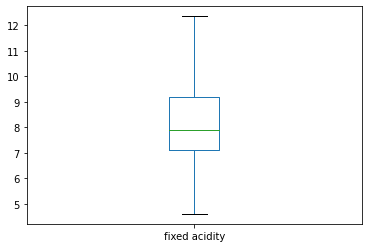

In [23]:
dt['fixed acidity'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

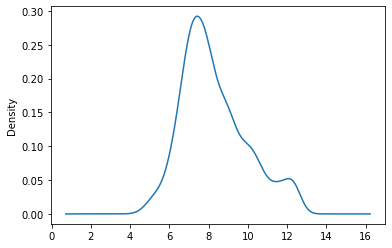

In [24]:
dt['fixed acidity'].plot(kind='kde')

In [25]:
IQR=dt['volatile acidity'].quantile(0.75)-dt['volatile acidity'].quantile(0.25)
lower_bridge=dt['volatile acidity'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['volatile acidity'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.015000000000000013 1.0150000000000001


In [26]:
dt.loc[dt['volatile acidity']>=1.0150000000000001,'volatile acidity']=1.0150000000000001
dt.loc[dt['volatile acidity']<=0.015000000000000013,'volatile acidity']=0.015000000000000013

<AxesSubplot:>

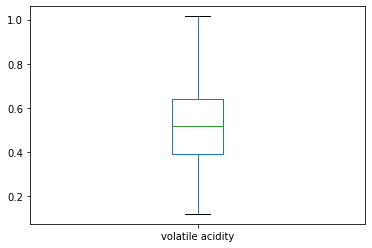

In [27]:
dt['volatile acidity'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

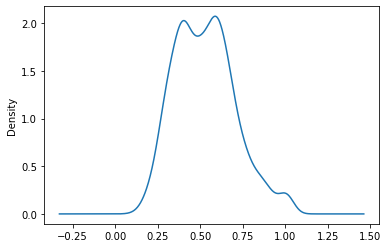

In [28]:
dt['volatile acidity'].plot(kind='kde')

In [29]:
IQR=dt['citric acid'].quantile(0.75)-dt['citric acid'].quantile(0.25)
lower_bridge=dt['citric acid'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['citric acid'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.42000000000000004 0.94


In [30]:
dt.loc[dt['citric acid']>=0.9149999999999999,'citric acid']=0.9149999999999999
dt.loc[dt['citric acid']<=-0.4049999999999999,'citric acid']=-0.4049999999999999

<AxesSubplot:ylabel='Density'>

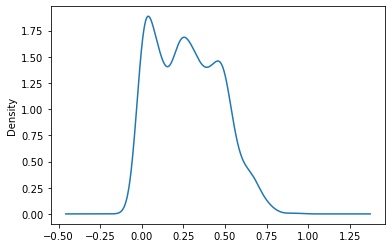

In [31]:
dt['citric acid'].plot(kind='kde')

<AxesSubplot:>

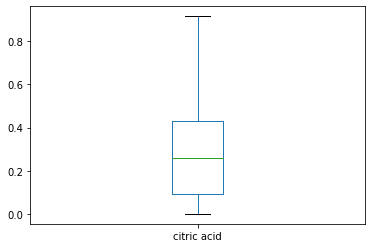

In [32]:
dt['citric acid'].plot(kind='box')

In [33]:
IQR=dt['residual sugar'].quantile(0.75)-dt['residual sugar'].quantile(0.25)
lower_bridge=dt['residual sugar'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['residual sugar'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.8499999999999996 3.6500000000000004


In [34]:
dt.loc[dt['residual sugar']>=3.6500000000000004,'residual sugar']=3.6500000000000004
dt.loc[dt['residual sugar']<=0.8499999999999996,'residual sugar']=0.8499999999999996

<AxesSubplot:>

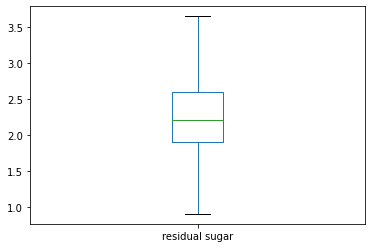

In [35]:
dt['residual sugar'].plot(kind='box')

In [36]:
IQR=dt['chlorides'].quantile(0.75)-dt['chlorides'].quantile(0.25)
lower_bridge=dt['chlorides'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['chlorides'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.03850000000000002 0.12249999999999998


In [37]:
dt.loc[dt['chlorides']>=0.11999999999999998,'chlorides']=0.11999999999999998
dt.loc[dt['chlorides']<=0.04000000000000002,'chlorides']=0.04000000000000002

<AxesSubplot:>

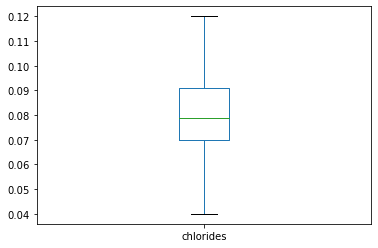

In [38]:
dt['chlorides'].plot(kind='box')

In [39]:
IQR=dt['free sulfur dioxide'].quantile(0.75)-dt['free sulfur dioxide'].quantile(0.25)
lower_bridge=dt['free sulfur dioxide'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['free sulfur dioxide'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-14.0 42.0


In [40]:
dt.loc[dt['free sulfur dioxide']>=42.0,'free sulfur dioxide']=42.0
dt.loc[dt['free sulfur dioxide']<=-14.0,'free sulfur dioxide']=-14.0

<AxesSubplot:>

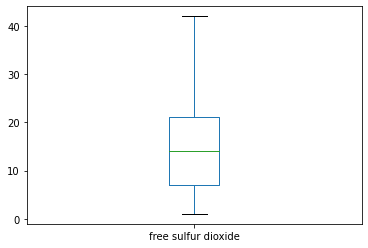

In [41]:
dt['free sulfur dioxide'].plot(kind='box')

In [42]:
IQR=dt['total sulfur dioxide'].quantile(0.75)-dt['total sulfur dioxide'].quantile(0.25)
lower_bridge=dt['total sulfur dioxide'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['total sulfur dioxide'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-39.5 124.5


In [43]:
dt.loc[dt['total sulfur dioxide']>=122.0,'total sulfur dioxide']=122.0
dt.loc[dt['total sulfur dioxide']<=-38.0,'total sulfur dioxide']=-38.0

<AxesSubplot:>

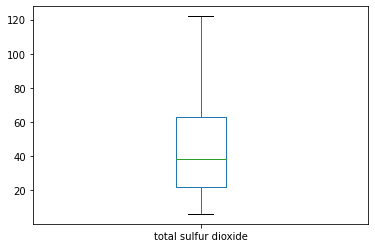

In [44]:
dt['total sulfur dioxide'].plot(kind='box')

In [45]:
IQR=dt['alcohol'].quantile(0.75)-dt['alcohol'].quantile(0.25)
lower_bridge=dt['alcohol'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['alcohol'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

7.1000000000000005 13.5


In [46]:
dt.loc[dt['alcohol']>=13.5,'alcohol']=13.5
dt.loc[dt['alcohol']<=7.1000000000000005,'alcohol']=7.1000000000000005

In [47]:
IQR=dt['pH'].quantile(0.75)-dt['pH'].quantile(0.25)
lower_bridge=dt['pH'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['pH'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.925 3.6849999999999996


In [48]:
dt.loc[dt['pH']>=3.6849999999999996,'pH']=3.6849999999999996
dt.loc[dt['pH']<=2.925,'pH']=2.925

In [49]:
IQR=dt['sulphates'].quantile(0.75)-dt['sulphates'].quantile(0.25)
lower_bridge=dt['sulphates'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['sulphates'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.28000000000000014 0.9999999999999999


In [50]:
dt.loc[dt['sulphates']>=0.9999999999999999,'sulphates']=0.9999999999999999
dt.loc[dt['sulphates']<=0.28000000000000014,'sulphates']=0.28000000000000014

In [51]:
IQR=dt['density'].quantile(0.75)-dt['density'].quantile(0.25)
lower_bridge=dt['density'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['density'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.99227 1.00115


In [52]:
dt.loc[dt['density']>=1.0011875,'density']=1.0011875
dt.loc[dt['density']<=0.9922475000000001,'density']=0.9922475000000001

<AxesSubplot:>

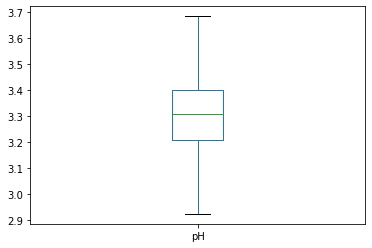

In [53]:
dt['pH'].plot(kind='box')

<AxesSubplot:>

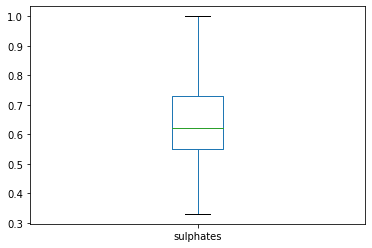

In [54]:
dt['sulphates'].plot(kind='box')

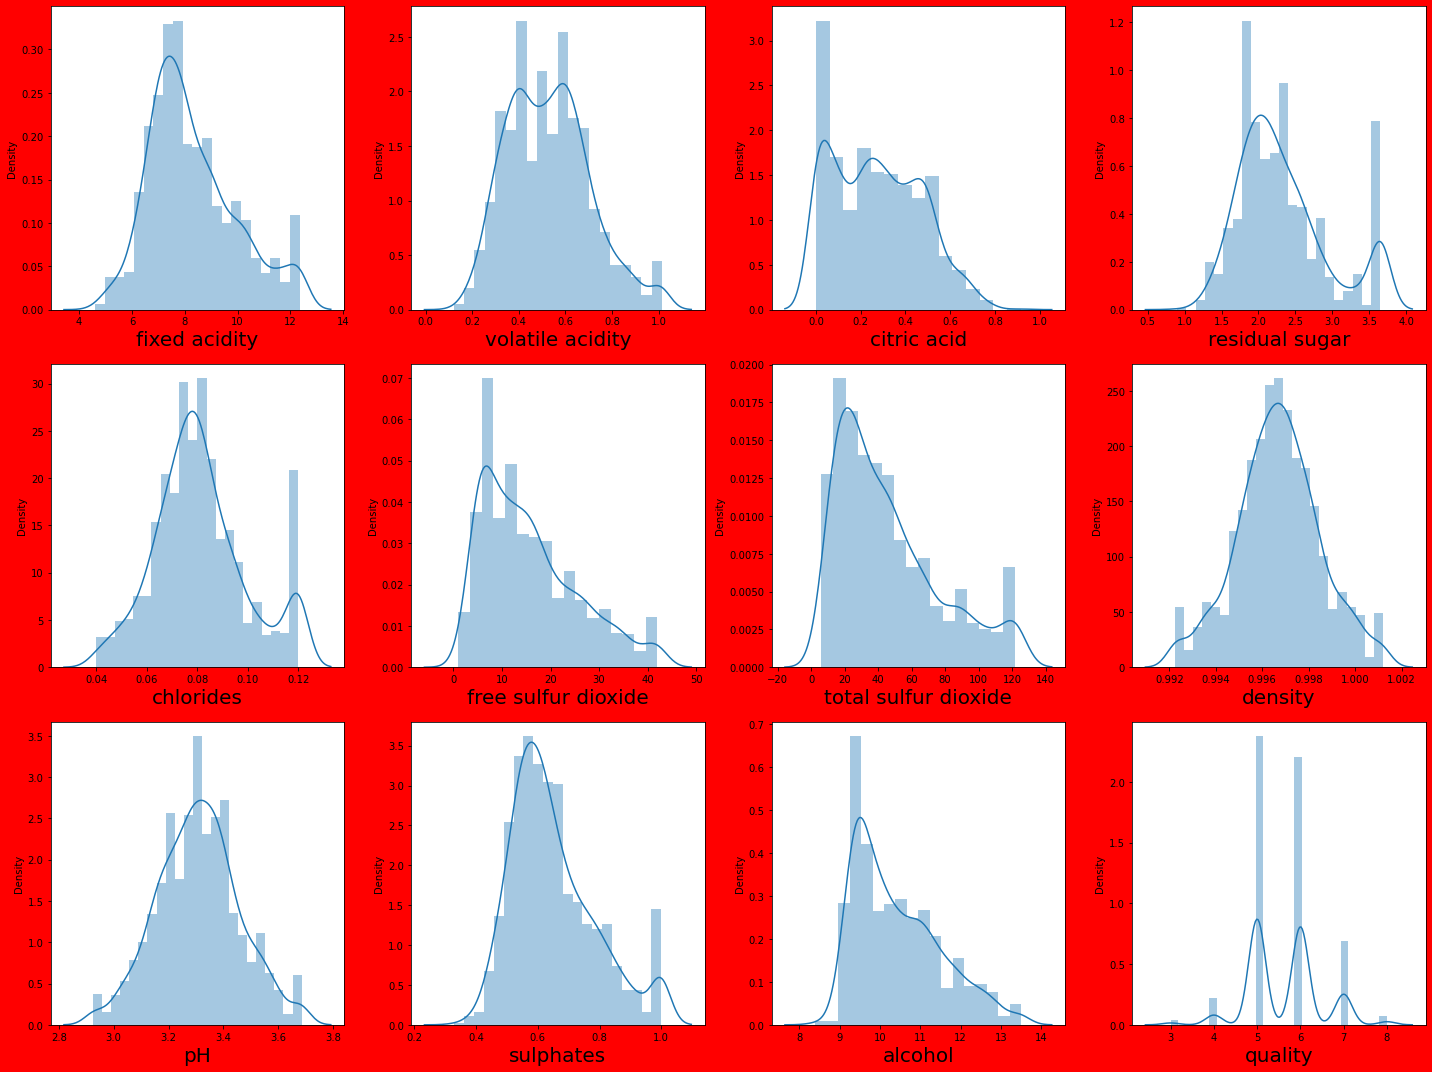

In [55]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in dt:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

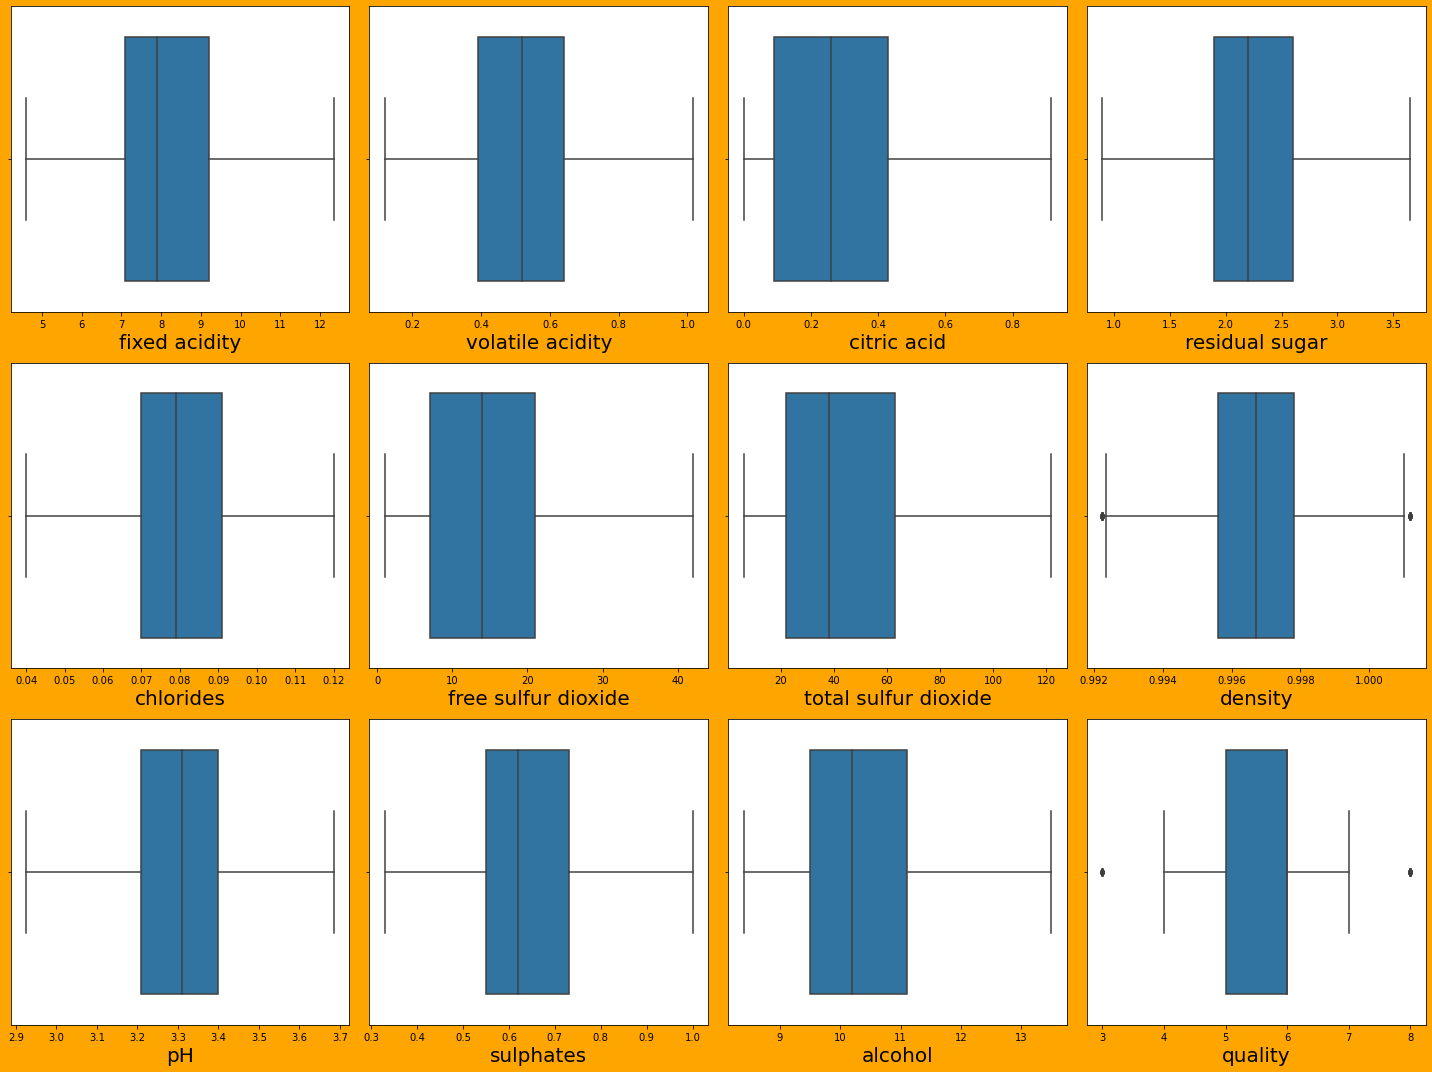

In [56]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber=1
for column in dt:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [57]:
dt.skew()

fixed acidity           0.675403
volatile acidity        0.459872
citric acid             0.302880
residual sugar          0.832523
chlorides               0.420641
free sulfur dioxide     0.855497
total sulfur dioxide    0.953168
density                 0.011795
pH                      0.068260
sulphates               0.817944
alcohol                 0.793652
quality                 0.192407
dtype: float64

In [58]:
dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [59]:
#Building model by using 2 variable classification by assigning 1 and 0
dt['quality1'] = np.where(dt['quality'] >= 7,1,0)
dt['quality2'] = np.where(dt['quality'] < 7,0,0)

In [60]:
dt['qualityN'] = dt['quality1'] + dt['quality2'] 

In [61]:
dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality1,quality2,qualityN
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0,0,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,0,0


In [62]:
# Assignment of X and y
X=dt.drop(['quality','quality1','quality2','qualityN'], axis=1)
y=dt.qualityN

<AxesSubplot:xlabel='qualityN', ylabel='count'>

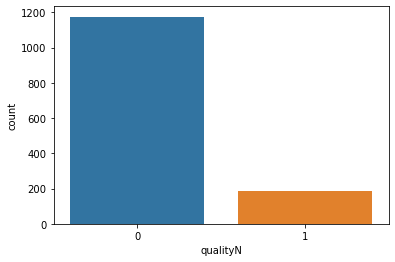

In [63]:
sns.countplot(y)

In [64]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [66]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [67]:
osmp=SMOTE(0.75)

In [68]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y)

In [69]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [70]:
# Importing PCA components
from sklearn.decomposition import PCA

In [71]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[ 1.27052297,  2.15336052,  2.23678572, ..., -0.69784875,
        -0.64201579, -0.26399024],
       [ 1.03670274,  1.26918973, -0.38958631, ...,  0.56162908,
         0.15614107, -0.36114526],
       [-0.38595557,  0.39540577,  1.94904634, ..., -0.84743967,
        -0.19128934, -0.20450402],
       ...,
       [-4.63179377,  0.48003048, -0.16854608, ...,  0.42224001,
         0.25933676, -0.36861202],
       [-2.09586516, -1.14164178, -0.50583811, ...,  0.20389333,
        -0.10832886,  0.15642956],
       [-1.51737675, -0.88100946, -0.83263066, ...,  0.07972748,
         0.27484428,  0.12471368]])

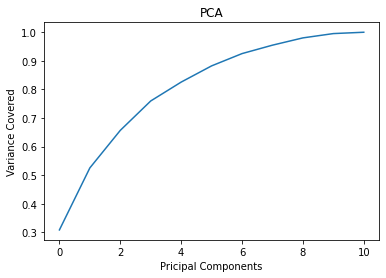

In [72]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [73]:
pca=PCA(n_components=9)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [74]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.270523,2.153361,2.236786,-0.931205,1.244361,1.268394,0.004115,1.229769,-0.697849
1,1.036703,1.269190,-0.389586,-1.059828,-0.245664,1.054297,-2.302688,0.390453,0.561629
2,-0.385956,0.395406,1.949046,0.474337,-0.138864,0.495575,0.704142,-1.111338,-0.847440
3,0.696406,-0.740453,-0.532801,1.633785,1.925163,-0.052820,-0.710005,1.332909,0.078254
4,-1.296971,-1.523389,0.382501,0.997956,-0.601286,-1.684992,-0.561298,1.896693,-0.285477
...,...,...,...,...,...,...,...,...,...
1526,-0.937535,-1.374245,-0.344658,-1.213326,-0.513482,-0.119579,0.444978,-0.149968,-0.067596
1527,-0.232457,-2.130550,-0.068957,-0.694697,-0.375721,-0.135849,0.095790,0.069403,0.003504
1528,-4.631794,0.480030,-0.168546,1.322389,-0.156787,-0.106851,1.006551,-0.226937,0.422240
1529,-2.095865,-1.141642,-0.505838,-0.105561,0.043881,0.315629,0.280751,-0.245182,0.203893


In [75]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [76]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8599348534201955 random_state 1
accuracy of the optimum model 0.8599348534201955 random_state 1
accuracy of the model 0.8371335504885994 random_state 2
accuracy of the model 0.8338762214983714 random_state 3
accuracy of the model 0.8175895765472313 random_state 4
accuracy of the model 0.8338762214983714 random_state 5
accuracy of the model 0.8469055374592834 random_state 6
accuracy of the model 0.8599348534201955 random_state 7
accuracy of the model 0.8371335504885994 random_state 8
accuracy of the model 0.8566775244299675 random_state 9
accuracy of the model 0.8403908794788274 random_state 10
accuracy of the model 0.8241042345276873 random_state 11
accuracy of the model 0.8892508143322475 random_state 12
accuracy of the optimum model 0.8892508143322475 random_state 12
accuracy of the model 0.8827361563517915 random_state 13
accuracy of the model 0.8338762214983714 random_state 14
accuracy of the model 0.8078175895765473 random_state 15
accuracy of the model 0.8

In [77]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9120521172638436 in random state 546


In [78]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8534201954397395 random_state 1
accuracy of the optimum model 0.8534201954397395 random_state 1
accuracy of the model 0.9022801302931596 random_state 2
accuracy of the optimum model 0.9022801302931596 random_state 2
accuracy of the model 0.8762214983713354 random_state 3
accuracy of the model 0.8566775244299675 random_state 4
accuracy of the model 0.8599348534201955 random_state 5
accuracy of the model 0.8729641693811075 random_state 6
accuracy of the model 0.8859934853420195 random_state 7
accuracy of the model 0.8566775244299675 random_state 8
accuracy of the model 0.8664495114006515 random_state 9
accuracy of the model 0.8664495114006515 random_state 10
accuracy of the model 0.8631921824104235 random_state 11
accuracy of the model 0.9153094462540716 random_state 12
accuracy of the optimum model 0.9153094462540716 random_state 12
accuracy of the model 0.8925081433224755 random_state 13
accuracy of the model 0.8925081433224755 random_state 14
accuracy of the mo

In [79]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9283387622149837 in random state 118


In [80]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8338762214983714 random_state 1
accuracy of the optimum model 0.8338762214983714 random_state 1
accuracy of the model 0.8501628664495114 random_state 2
accuracy of the optimum model 0.8501628664495114 random_state 2
accuracy of the model 0.8827361563517915 random_state 3
accuracy of the optimum model 0.8827361563517915 random_state 3
accuracy of the model 0.8338762214983714 random_state 4
accuracy of the model 0.8534201954397395 random_state 5
accuracy of the model 0.8371335504885994 random_state 6
accuracy of the model 0.8534201954397395 random_state 7
accuracy of the model 0.8599348534201955 random_state 8
accuracy of the model 0.8403908794788274 random_state 9
accuracy of the model 0.8697068403908795 random_state 10
accuracy of the model 0.8306188925081434 random_state 11
accuracy of the model 0.8501628664495114 random_state 12
accuracy of the model 0.8403908794788274 random_state 13
accuracy of the model 0.8762214983713354 random_state 14
accuracy of the mod

In [81]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9315960912052117 in random state 419


In [82]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[07:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8859934853420195 random_state 1
accuracy of the optimum model 0.8859934853420195 random_state 1
[07:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8762214983713354 random_state 2
[07:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [83]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9250814332247557 in random state 136


In [84]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8306188925081434 random_state 1
accuracy of the optimum model 0.8306188925081434 random_state 1
accuracy of the model 0.8534201954397395 random_state 2
accuracy of the optimum model 0.8534201954397395 random_state 2
accuracy of the model 0.8469055374592834 random_state 3
accuracy of the model 0.8143322475570033 random_state 4
accuracy of the model 0.8306188925081434 random_state 5
accuracy of the model 0.8664495114006515 random_state 6
accuracy of the optimum model 0.8664495114006515 random_state 6
accuracy of the model 0.8566775244299675 random_state 7
accuracy of the model 0.8338762214983714 random_state 8
accuracy of the model 0.8469055374592834 random_state 9
accuracy of the model 0.8338762214983714 random_state 10
accuracy of the model 0.8208469055374593 random_state 11
accuracy of the model 0.8338762214983714 random_state 12
accuracy of the model 0.8762214983713354 random_state 13
accuracy of the optimum model 0.8762214983713354 random_state 13
accuracy of

In [85]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9250814332247557 in random state 740


In [86]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8827361563517915 random_state 1
accuracy of the optimum model 0.8827361563517915 random_state 1
accuracy of the model 0.8599348534201955 random_state 2
accuracy of the model 0.9022801302931596 random_state 3
accuracy of the optimum model 0.9022801302931596 random_state 3
accuracy of the model 0.8534201954397395 random_state 4
accuracy of the model 0.8469055374592834 random_state 5
accuracy of the model 0.8599348534201955 random_state 6
accuracy of the model 0.8892508143322475 random_state 7
accuracy of the model 0.8631921824104235 random_state 8
accuracy of the model 0.8794788273615635 random_state 9
accuracy of the model 0.8599348534201955 random_state 10
accuracy of the model 0.8566775244299675 random_state 11
accuracy of the model 0.8990228013029316 random_state 12
accuracy of the model 0.9087947882736156 random_state 13
accuracy of the optimum model 0.9087947882736156 random_state 13
accuracy of the model 0.8762214983713354 random_state 14
accuracy of the mo

In [87]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9283387622149837 in random state 740


In [88]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8697068403908795 random_state 1
accuracy of the optimum model 0.8697068403908795 random_state 1
accuracy of the model 0.8827361563517915 random_state 2
accuracy of the optimum model 0.8827361563517915 random_state 2
accuracy of the model 0.8697068403908795 random_state 3
accuracy of the model 0.8403908794788274 random_state 4
accuracy of the model 0.8403908794788274 random_state 5
accuracy of the model 0.8794788273615635 random_state 6
accuracy of the model 0.8892508143322475 random_state 7
accuracy of the optimum model 0.8892508143322475 random_state 7
accuracy of the model 0.8631921824104235 random_state 8
accuracy of the model 0.8859934853420195 random_state 9
accuracy of the model 0.8762214983713354 random_state 10
accuracy of the model 0.8566775244299675 random_state 11
accuracy of the model 0.9055374592833876 random_state 12
accuracy of the optimum model 0.9055374592833876 random_state 12
accuracy of the model 0.8892508143322475 random_state 13
accuracy of

In [89]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9218241042345277 in random state 603


In [90]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    re=RandomForestClassifier()
    re.fit(x_train, y_train)
    pred=re.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.9055374592833876 random_state 1
accuracy of the optimum model 0.9055374592833876 random_state 1
accuracy of the model 0.9315960912052117 random_state 2
accuracy of the optimum model 0.9315960912052117 random_state 2
accuracy of the model 0.9120521172638436 random_state 3
accuracy of the model 0.8957654723127035 random_state 4
accuracy of the model 0.8925081433224755 random_state 5
accuracy of the model 0.8925081433224755 random_state 6
accuracy of the model 0.9022801302931596 random_state 7
accuracy of the model 0.9087947882736156 random_state 8
accuracy of the model 0.9055374592833876 random_state 9
accuracy of the model 0.9087947882736156 random_state 10
accuracy of the model 0.8990228013029316 random_state 11
accuracy of the model 0.9283387622149837 random_state 12
accuracy of the model 0.9348534201954397 random_state 13
accuracy of the optimum model 0.9348534201954397 random_state 13
accuracy of the model 0.9185667752442996 random_state 14
accuracy of the mo

In [91]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9641693811074918 in random state 740


In [ ]:
# obtaining obptimal random states

In [93]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=546)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 546)
print(classification_report(y_test,pred1))

accuracy of the model 0.9120521172638436 random_state 546
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       180
           1       0.87      0.93      0.90       127

    accuracy                           0.91       307
   macro avg       0.91      0.91      0.91       307
weighted avg       0.91      0.91      0.91       307



In [94]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=118)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state',118)
print(classification_report(y_test,pred2))

accuracy of the model 0.9283387622149837 random_state 118
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       174
           1       0.86      0.99      0.92       133

    accuracy                           0.93       307
   macro avg       0.93      0.94      0.93       307
weighted avg       0.94      0.93      0.93       307



In [104]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=419)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 419)
print(classification_report(y_test,pred3))

accuracy of the model 0.9218241042345277 random_state 419
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       167
           1       0.91      0.92      0.91       140

    accuracy                           0.92       307
   macro avg       0.92      0.92      0.92       307
weighted avg       0.92      0.92      0.92       307



In [96]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=136)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 136)
print(classification_report(y_test,pred4))

[08:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.9250814332247557 random_state 136
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       172
           1       0.89      0.94      0.92       135

    accuracy                           0.93       307
   macro avg       0.92      0.93      0.92       307
weighted avg       0.93      0.93      0.93       307



In [97]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=740)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 740)
print(classification_report(y_test,pred5))

accuracy of the model 0.9250814332247557 random_state 740
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       180
           1       0.89      0.93      0.91       127

    accuracy                           0.93       307
   macro avg       0.92      0.93      0.92       307
weighted avg       0.93      0.93      0.93       307



In [98]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=740)
gc=GradientBoostingClassifier()
gc.fit(x_train, y_train)
pred6=gc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 740)
print(classification_report(y_test,pred6))

accuracy of the model 0.9250814332247557 random_state 740
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       180
           1       0.90      0.92      0.91       127

    accuracy                           0.93       307
   macro avg       0.92      0.92      0.92       307
weighted avg       0.93      0.93      0.93       307



In [99]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=740)
sc=SVC()
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 740)
print(classification_report(y_test,pred7))

accuracy of the model 0.9087947882736156 random_state 740
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       180
           1       0.87      0.91      0.89       127

    accuracy                           0.91       307
   macro avg       0.90      0.91      0.91       307
weighted avg       0.91      0.91      0.91       307



In [100]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
re=RandomForestClassifier()
re.fit(x_train, y_train)
pred8=re.predict(x_test)
acc=accuracy_score(y_test,pred)
print('accuracy of the model', acc,'random_state', i)
print(classification_report(y_test,pred8))

accuracy of the model 0.9185667752442996 random_state 799
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       178
           1       0.89      0.90      0.90       129

    accuracy                           0.91       307
   macro avg       0.91      0.91      0.91       307
weighted avg       0.91      0.91      0.91       307



In [107]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)
fpr7,tpr7,thresholds=roc_curve(y_test,pred7)
roc_auc7=auc(fpr7,tpr7)
fpr8,tpr8,thresholds=roc_curve(y_test,pred8)
roc_auc8=auc(fpr8,tpr8)

In [108]:
print(roc_auc1,
      roc_auc2,
      roc_auc3,
      roc_auc4,
      roc_auc5,
      roc_auc6,
      roc_auc7,
      roc_auc8)

0.506437125748503 0.4818006843455946 0.9217921300256627 0.46877673224978617 0.5184131736526946 0.5112703165098375 0.5022882805816937 0.5309666381522669


In [111]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes': range(2,10),
        'max_depth': range(2,10),
        'min_samples_split':range(2,10),
        'max_features': ["auto", "sqrt", "log2"],
        'criterion' : ["gini", "entropy", "log_loss"]}

In [112]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(DecisionTreeClassifier(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 9, 'min_samples_split': 5}


In [123]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=419)
de=DecisionTreeClassifier(criterion='gini', max_depth=7, max_features='auto', max_leaf_nodes=9, min_samples_split=5)
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 419)
print(classification_report(y_test,pred3))

accuracy of the model 0.9250814332247557 random_state 419
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       167
           1       0.93      0.90      0.92       140

    accuracy                           0.93       307
   macro avg       0.93      0.92      0.92       307
weighted avg       0.93      0.93      0.92       307



In [ ]:
#pickling
import pickle
filename = 'wqe'
outfile = open(filename,'wqe')
pickle.dump(wqe_dict,outfile)
outfile.close()

# Conclusion
The model accuracy of the model 0.9250814332247557 random_state 419 was acheived by gradient boost. The PCA method was used and other encoding techniques. As it was a multiclass classification the label was reduced to 0 and 1 making it a classification problem.